In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from itertools import product 
import operator


# Part 1 - Implementation of Logistic Regression

Logistic Regression ia binary classification algorithm. It can also be modelled as a neural network that can take any number of inputs and limit the output between 0 and 1. We can model Logistic Regression as a one-layer neural network. <BR>
The weights and bias are assigned to the input and sigmoid function is applied on that output to get the probability of the particular class given the weights and output.<BR>
The weights and bias are adjusted to get the correct output using *gradient descent approach*.
    
\begin{equation}
z = w*x + b 
\end{equation}
\begin{equation}    
ypred = sigmoid(z)
\end{equation}

    where,
    w is the vector of weights
    x is the vector of inputs
    b is the bias associated with each neuron
    ypred is the predicted output 
    
Sigmoid function is tha activation function which constraints the output between 0 and 1 which is applied 'z'. The formula is as follows :

$$  f(z)={\frac{1}{1+e^{-z}}} $$
    


<div>
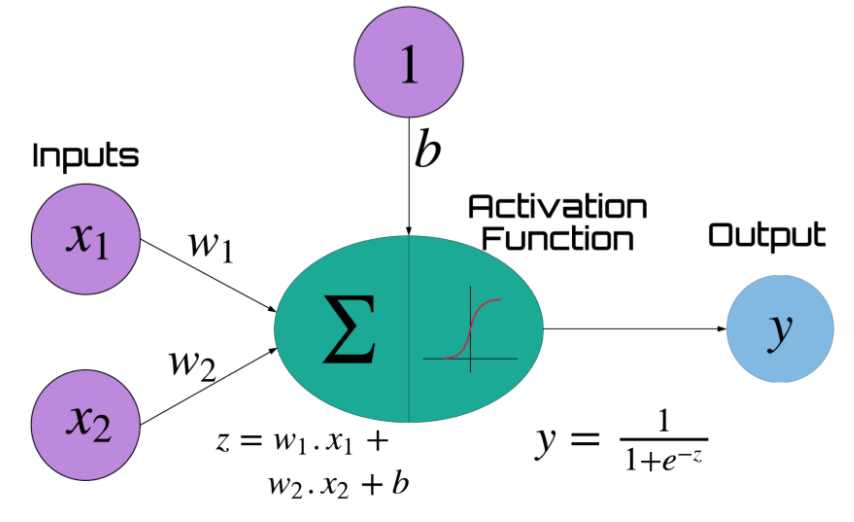
</div>
Source of image :https://towardsdatascience.com/neural-networks-with-numpy-for-absolute-beginners-part-3-logistic-regression-18b474096a4e

**Cost Function** : The weights are updated using gradient descent approach which tries to reduce the cost function and moves towards the global minimum by updating the weights.<BR>
$$ cost function = -[y.log(y_pred)+(1-y).log(1-y_pred)]$$


#### Scaler function to perform standard scaling 

In [2]:
## Function for performing scaling of the dataset
class mystandardscaler():    
    def __init__(self): 
        pass
        #self.mean = 1
        #self.std = 1        
        
    def scale_train(self,x_df):   ## Function for standardization of the training dataset. The function returns mean and std used for scaling the test data 
        x_np=x_df.values
        self.mean=np.mean(x_np,axis=0)
        self.std=np.std(x_np,axis=0)
        x_scaled=(x_np-self.mean)/self.std
        return x_scaled

    def scale_transform(self,x_test):   ## Function for scaling the test data with scales obtained from training data
        x_test_sc=(x_test.values-self.mean)/self.std
        return x_test_sc

#### Logistic Regression

In [3]:
## Logistic Regression algorithm
class mylogisticreg:
    
    def __init__(self,max_iter=20000,alpha=0.05):
        self.max_iter=max_iter
        self.alpha=alpha          
        
    # activation function
    def sigmoid(self,z):
        f=1/(1+np.exp(-z))
        return f
    ## function for calculating the cost function
    def cost_func(self,y_hat,y):
        cost= y*np.log(y_hat)+(1-y)*np.log(1-y_hat+0.00001)
        return cost
    # function was updating weight
    def delta_weight(self,y_hat,y,x):
        d_w=(y_hat-y)*x    
        return d_w
    # function was updating bias
    def delta_bias(self,y_hat,y):
        d_b=y_hat-y    
        return d_b
    
    def fit(self,x,y,threshold=10**-6):
        y = y.values
               
        self.w = np.random.normal(0,0.01,x.shape[1]) ##weight initialization
        self.b = np.random.uniform(0,1)

        count = 0
        for i in range(self.max_iter):            
            count=count+1
            ## Choosing one sample at a time from the dataset as we are performing SGD
            index = np.random.randint(x.shape[0])
            x_ = x[index]
            y_ = y[index]

            y_hat = self.sigmoid(np.dot(self.w,x_)+self.b)
            cost_prev = self.cost_func(y_hat,y_)

            self.w = self.w-self.alpha*self.delta_weight(y_hat,y_,x_)
            self.b = self.b-self.alpha*self.delta_bias(y_hat,y_)

            y_hat = self.sigmoid(np.dot(self.w,x_)+self.b)
            cost_curr = self.cost_func(y_hat,y_)        
            
            ## If there is no updation in the weights and cost function difference is below certain threshold then it is come out loop
            if abs(cost_prev-cost_curr) < threshold:
                break    
    
    def predict(self,x):
        y_predict=np.dot(x, self.w)+self.b
        #print(type(y_predict))
        return y_predict > 0.5

In [4]:
def accuracy(y_pred,y_actual):
    
    result=y_pred==y_actual
    acc=sum(result)/np.size(y_pred)
    return acc
    

## Part 2 - Implementing Logistic Regression on sample dataset

### Blob dataset  (linear dataset)

In [5]:
blob = pd.read_csv("blobs250.csv")

In [6]:
x_t_blob=blob.drop(columns = "Class")
y=blob["Class"]

## splitting the dataset into train,test and validation dataset in 70:15:15 ratio

x_t,x_test,y_t,y_test_blob = train_test_split(x_t_blob,y,test_size=0.15, random_state=42 )
x_train,x_val,y_train_blob,y_val_blob = train_test_split(x_t,y_t,test_size=0.15, random_state=42 )

## Scaling the dataset using standard normalization

sc=mystandardscaler()
x_train_sc_blob=sc.scale_train(x_train)
x_val_sc_blob = sc.scale_transform(x_val)
x_test_sc_blob = sc.scale_transform(x_test)

In [7]:
# Hyperparameter optimization to find the best parameter for the dataset
        
alpha = [0.01,0.03,0.05]
max_iter = [2000,5000,10000]
parameter = {}
for i in product(alpha,max_iter):
    LR = mylogisticreg(max_iter=i[1],alpha=i[0])
    LR.fit(x_train_sc_blob,y_train_blob)
    yval_pred = LR.predict(x_val_sc_blob)
    acc = accuracy(yval_pred,y_val_blob)
    parameter[i] = round(acc,6)
    

## saving best parameter
best_param_ = max(parameter.items(), key=operator.itemgetter(1))[0]
alpha,max_iter = best_param_
print("Best parameter - alpha :{} , max_iter : {}".format(alpha,max_iter))
## Training the model with the best parameter
LR = mylogisticreg(max_iter=max_iter,alpha=alpha)
LR.fit(x_train_sc_blob,y_train_blob)


Best parameter - alpha :0.01 , max_iter : 2000


In [8]:
##calculating accuracy on the test 
y_test_pred=LR.predict(x_test_sc_blob)
acc = accuracy(y_test_pred,y_test_blob)
print("The accuracy on the blob dataset is : ",acc)

The accuracy on the blob dataset is :  1.0


### Moon dataset (non-linear dataset)

In [9]:
moon = pd.read_csv("moons400.csv")


In [36]:
x_t_moon=moon.drop(columns = "Class")
y=moon["Class"]

## splitting the dataset into train,test and validation dataset in 70:15:15 ratio

x_t,x_test,y_t,y_test_moon = train_test_split(x_t_moon,y,test_size=0.15, random_state=42 )
x_train,x_val,y_train_moon,y_val_moon = train_test_split(x_t,y_t,test_size=0.15, random_state=42 )

## Scaling the dataset using standard normalization

sc = mystandardscaler()
x_train_sc_moon=sc.scale_train(x_train)
x_val_sc_moon = sc.scale_transform(x_val)
x_test_sc_moon = sc.scale_transform(x_test)

In [40]:
# Hyperparameter optimization to find the best parameter for the dataset based on the highest accuracy

# Hyperparameter Optimization
            
alpha = [0.01,0.03,0.05]
max_iter = [5000,10000]
parameter = {}
for i in product(alpha,max_iter):
    LR = mylogisticreg(max_iter=i[1],alpha=i[0])
    LR.fit(x_train_sc_moon,y_train_moon)
    yval_pred = LR.predict(x_val_sc_moon)
    acc = accuracy(yval_pred,y_val_moon)
    parameter[i] = round(acc,6)

## saving best parameter
best_param_ = max(parameter.items(), key=operator.itemgetter(1))[0]
alpha,max_iter = best_param_
print("Best parameter - alpha :{} , max_iter : {}".format(alpha,max_iter))

## Training the model with the best parameter
LR = mylogisticreg(max_iter=max_iter,alpha=alpha)
LR.fit(x_train_sc_moon,y_train_moon)

Best parameter - alpha :0.01 , max_iter : 5000


In [41]:
##calculating accuracy on the test 
y_pred_test=LR.predict(x_test_sc_moon)
y_pred_train=LR.predict(x_train_sc_moon)
acc = accuracy(y_pred_test,y_test_moon)
print("Training accuracy on moon dataset :",accuracy(y_pred_train,y_train_moon))
print("Test dataset accuracy on moon dataset :",accuracy(y_pred_test,y_test_moon))

Training accuracy on moon dataset : 0.8754325259515571
Test dataset accuracy on moon dataset : 0.85


### Observations
* The algorithm has performed well on the linear data with is blob dataset and getting 100% accuracy on the train and test after performing the hyperparameter tunning. <BR>
* The algorithm has performed average on the non-linear data with is moon dataset and getting 88% accuracy on the train and 83% on test after performing the hyperparameter tunning.



# Part 3 - Implementation of Shallow Neural network

#### Neural Network with hidden layer

Neural Network with one hidden layer has been implemented. Training of the neural network involves two steps i.e. Forward and Backward propagation to update the weights and tries to converge and reduce cost by reaching the global minima. The weights and biases are initialised to a small value and are improved during the training process.

**Forward Propagation**<BR>
    
The set of x input values are propagated forward with the weights and biases and the predicted output is then compared with the actual output and the cost is calculated.<BR>
 
z is the sum of inputs into node in layer *l*. <BR>
$$ z[l] = w*a[l-1] + bias[l] $$<BR>
    <BR>
    where w is the vector of weights in layer l.<BR>
    a is the output of the previous layer.<BR>
    
    a[l] = activation_function(z[l])

**Activation Function**
Activation function used in the implementation is sigmoid activation function.
        
$$  f(z)={\frac{1}{1+e^{-z}}} $$   <BR>

**Other Activation Function**
**ReLU and LeakyReLU activation functions:**<BR>
It is linear function transforms the weighted sum of inputs as it is if it is positive otherwise 0.<BR>

**1)ReLU**<BR>
       $$ f(z) = z$$ if z > 0  <BR>
       $$ f(z) = 0  $$ if z < 0  <BR>
**2)LeakyReLU**<BR>
       $$ f(z) = z $$ if z > 0  <BR>
       $$ f(z) = 0.01*z $$ if z < 0 <BR>
    
**Cost Function**<BR>
$$ cost function = -[y.log(y_pred)+(1-y).log(1-y_pred)]$$
        
**Backward Propagation**<BR>
 
The predicted output is compared with the actual output and the weights are updated in the backward propagated way starting from the outer layer to the initial layer.<BR> 

**Output layer**:<BR>
        First : $$delta{z1}^{[l]}=a1^{[l]} - y1 $$ <BR>
        Then : $$ {deltaw1}^{[l]}=deltaz1^{[l]}a^{[l-1]}$$<BR>  $$deltab1^{[l]} = deltaz1^{[l]} $$  
        <BR>
**Hidden Layer**: Loop backwards from l-1 to 1<BR>
        First : $$delta{z_i}^{[l]}= f^{'}(z_i^{[l]})\sum\limits _{j}(deltaz_j^{[l+1]}Wji^{[l+1]}) $$ <BR>
        Then : $$ deltaw_{ji}^{[l]}=deltaz_1^{[l]}a^{[l-1]}$$<BR>  $$deltab_j^{[l]} = deltaz_j^{[l]} $$  <BR>

**Stochastic Gradient Descent**: One sample from the input are chosenat random and weights are updated. Loop over all weights and biases and update weight with learning rate alpha $\alpha$ <BR>
            $$ W{ji}^{[l]} -= {\alpha} * deltaw_{ji}^{[l]}$$<BR>
            $$ b{j}^{[l]} -= {\alpha} * deltab_{j}^{[l]} $$ <BR>
            where, i is the index in layer l and j is the index in layer l+1

#### Activation functions

In [15]:
## Different activation function with their derivatives are defined below:
def sigmoid(z):
    f=1/(1+np.exp(-z))
    return f

def der_sigmoid(z): ## derivative of sigmoid
    f = sigmoid(z).dot((1-sigmoid(z)).T)
    return f    

def reLU(z):    
    return np.maximum(0, z)    
    
def der_reLU(z): ## derivative of reLU   
    der_z = np.where(z>0,1,0)
    return der_z

def leakyreLU(z):
    return np.maximum(0.1*z,z)
    
def der_leakyreLU(z):  ## derivative of leaky reLU   
    der_z = np.where(z>0,1,0.1)
    return der_z        

def cost_func(y_hat,y): ## function for calculating cost function
    cost= y*np.log(y_hat)+(1-y)*np.log(1-y_hat+0.00001)
    return cost

In [20]:
## Function for forward propagation
def forward_prop(x,w1,w2,b1,b2,activation_func):           
    ##a_1 is the output of the first hidden layer and a_2 is the predicted output   
    z_1 = np.dot(x.T,w1) + b1        
    if activation_func == 'sigmoid':
        a_1 = sigmoid(z_1)
    elif activation_func == "leakyreLU":
        a_1 = leakyreLU(z_1)
    else :
        a_1 = reLU(z_1)   
    z_2 = np.dot(a_1,w2) + b2
    a_2 = sigmoid(z_2) ## final predicted output by the NN

    return z_1,a_1,z_2,a_2

## Function for backward propgation    
def back_prop(a_2,x,y,w1,w2,z_1,a_1,activation_func):
     ## back propagation - output layer gradient update
    delta_z2 = a_2 - y            
    delta_w2 = delta_z2*a_1            
    delta_b2 = delta_z2

    ## back propagation - hidden layer gradient update
    if activation_func=='sigmoid':
        der_activation = der_sigmoid(z_1)                
    if activation_func=="leakyreLU":
        der_activation = der_leakyreLU(z_1)
    else :
        der_activation = der_reLU(z_1) 

    delta_z1 = np.multiply(der_activation.T,np.dot(w2,delta_z2))
    delta_w1 = np.dot(delta_z1,x.T)
    #print("delta_w1",delta_w1)
    delta_b1 = delta_z1
    
    return delta_z2,delta_w2,delta_b2,delta_z1,delta_w1,delta_b1
## Function for training the neural network algorithm which returns optimized weights with the given parameters
def train(x,y,hidden,activation_func,output=1,max_iter=5000,alpha=0.01,threshold=10**-6,drop_ratio=1):
    
    ip=x.shape[1]
    hidden=hidden
    output=output
    if type(y)!=np.ndarray:
        y=y.values
    ##w1,w2 and b1,b2 are the weights and biases respectively
    ## weights and bias parameters are initialized
    w1 = np.random.normal(0,0.01,(ip,hidden))
    w2 = np.random.normal(0,0.01,(hidden,output))
      
    b1 = np.random.uniform(0,1,hidden).reshape(1, hidden)
    b2 = np.random.uniform(0,1,output).reshape(1, output)

    cost_prev = 0
    for i in range(max_iter):
            ## drop_ratio is 1 then all the neurons will be active
            
            if drop_ratio!=1:       
                ## The neuron will be turned off in the hidden layer as per the mentioned drop_ratio
                if random.uniform(0.1,1) < 0.1:
                    drop_out = drop_ratio
                    hidden_layer_off=np.floor(hidden*drop_out)
                    #print(random.sample(range(1, np.int(hidden)), np.int(hidden_layer_off)))
                    for j in random.sample(range(1, np.int(hidden)), np.int(hidden_layer_off)):        
                        w1[:,j-1] = 0
                        w2[j-1] = 0
                        #b1[:,j-1] = 0            
            ## random 1 sample is chosen from the training set as we are performing Stochastic Gradient Descent
            index = np.random.randint(x.shape[0])
            x_ = x[index].reshape(x.shape[1],1)
            y_ = y[index]            
            
            ##calling forward Propagation function
            z_1,a_1,z_2,a_2 = forward_prop(x_,w1,w2,b1,b2,activation_func)            
            
            ## calulating the cost with the updated weights
            cost_curr = cost_func(a_2,y_)
            ##If the difference between the consequent cost less than threshold then it stop updating weights
            if abs(cost_prev-cost_curr) < threshold: 
                print('Break off cost ', cost_curr)
                break
#             if i % 1000 == 0:
#                 print(f'cost at {i} iteration: {cost_curr}')
                
            cost_prev = cost_curr #previous cost is updated
            
            ##  Calling back propagation back propagation
            
            delta_z2,delta_w2,delta_b2,delta_z1,delta_w1,delta_b1 = back_prop(a_2,x_,y_,w1,w2,z_1,a_1,activation_func)
                       
            ## weight updation 
            w1 = w1 - alpha*np.matrix(delta_w1).T
            b1 = b1 - alpha*delta_b1.T
            
            w2 = w2 - alpha*np.matrix(delta_w2).T
            b2 = b2 - alpha*delta_b2                        
            
    return w1,w2,b1,b2

## function for predicting the output               
def predict(x,w1,w2,b1,b2):
    z_1 = np.dot(x,w1) + b1                  
    a_1 = sigmoid(z_1)

    z_2 = np.dot(a_1,w2) + b2
    a_2 = sigmoid(z_2)
    y_pred = np.squeeze(np.asarray(a_2))
       
    return [1 if i > 0.5 else 0 for i in y_pred]


### Performance on blob dataset



In [21]:
## fitting the algorithm on the blob dataset:

w1,w2,b1,b2=train(x_train_sc_blob,y_train_blob,6,"sigmoid",output=1,max_iter=10000,alpha=0.01,threshold=10**-6)

## Training accuracy and testing accuarcy on blob dataset
y_pred_train=predict(x_train_sc_blob,w1,w2,b1,b2)
y_pred_test= predict(x_test_sc_blob,w1,w2,b1,b2)

Break off cost  [[-0.03102512]]


In [22]:
print("Training accuracy on blob dataset :",accuracy(y_pred_train,y_train_blob))
print("Test dataset accuracy on blob dataset :",accuracy(y_pred_test,y_test_blob))

Training accuracy on blob dataset : 1.0
Test dataset accuracy on blob dataset : 1.0


### Performance on moon dataset (non - linear)

In [50]:
## Hyper parameter tunning to get the best parameter which is obtained at the highest accuracy 
alpha = [0.001,0.01]
max_iter = [4000,5000,6000]
hidden=[4,6,8]
parameter = {}
for i in product(alpha,max_iter,hidden):
    w1,w2,b1,b2=train(x_train_sc_moon,y_train_moon,hidden=i[2],alpha=i[0],max_iter=i[1],activation_func="sigmoid")
    y_val_moon_p= predict(x_val_sc_moon,w1,w2,b1,b2)
    acc = accuracy(y_val_moon_p,y_val_moon)
    parameter[i] = round(acc,6)

## saving best parameter
best_param_ = max(parameter.items(), key=operator.itemgetter(1))[0]
alpha,max_iter,hidden = best_param_



Break off cost  [[-0.50618952]]
Break off cost  [[-0.69162291]]
Break off cost  [[-0.77151239]]
Break off cost  [[-0.64465102]]
Break off cost  [[-0.13143086]]


In [51]:
## Training the dataset with the best parameters

print("Best parameter - alpha :{} , max_iter : {}, hidden : {}".format(alpha,max_iter,hidden))

w1,w2,b1,b2 = train(x_train_sc_moon,y_train_moon,activation_func="sigmoid",alpha=alpha,max_iter=max_iter,hidden=hidden)
y_pred_train = predict(x_train_sc_moon,w1,w2,b1,b2)
y_pred_test= predict(x_test_sc_moon,w1,w2,b1,b2)


Best parameter - alpha :0.01 , max_iter : 5000, hidden : 4


In [52]:
print("Training accuracy on moon dataset :",accuracy(y_pred_train,y_train_moon))
print("Test dataset accuracy on moon dataset :",accuracy(y_pred_test,y_test_moon))

Training accuracy on moon dataset : 0.8788927335640139
Test dataset accuracy on moon dataset : 0.9


### Observations
* The accuracy on the non-linear moon dataset has improved from 85% to 90% by using the shallow neural network with the best parameter found using hyperparameter tunning.<BR>
* The shallow NN has performed well on the linear data with is blob dataset and getting 100% accuracy on the train and test after performing the hyperparameter tunning. <BR>

## Part 4 - Implementation of NN on the image dataset

### Loading dataset

The CIFAR image dataset has been loaded and various functions are defined required for the process. The functions are cited from the "Load and View CIFAR-10 Data" ipynb file which is written Dr. Michael Madden

In [53]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
## function for loading different batches
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch
## for loading labels
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

In [54]:
## reading batch1 
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [55]:
## Loading all images and labels from batch1
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

## Loading the respective name of the labels
names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


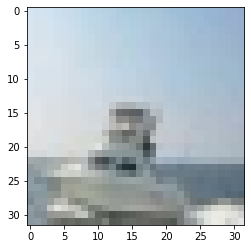

Image 100 : Class is  b'ship'


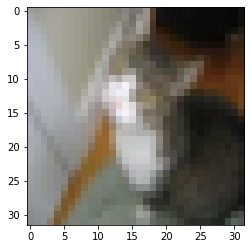

Image 101 : Class is  b'cat'


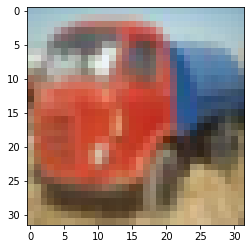

Image 102 : Class is  b'truck'


In [56]:
# Display few images from the batch
for i in range (100,103):
   visualise(data, i)
   print("Image", i,": Class is ", names[labels[i]])

###  Dataset Preparation and Preprocessing to classify "horse" and "cat"

* 1 batch has been selected from the 5 batches which has 10000 images.<br>
* Each image has 3 colour channels, so the image is converted to vector of 1024 floats to extract the R color channel of the image.<br>
* Task is to classify "horse" and "cat" from the dataset, so the dataset is filtered with the images of "horse" and "cat" which is 2017 in size.
* The labels 7 and 3 in the output are encoded into 0 and 1 to perform binary classification.
* The image pixel size is 0-255 which is scaled between 0-1.
* The dataset is divided into train, validation and test sets with the ratio of 70:15:15. 


In [57]:
##Choosing the R colour channel from the 3 RGB channels of the image 
data1=np.array(data[:,:1024])

## Loading label names
labeln=loadlabelnames()

label_name={}
for i,k in enumerate(labeln):
    label_name[k]=i
    
print("label name : ",label_name)

## Filtering the images of "horse" and "cat" from the dataset

index=[]
for i,label in enumerate(labels):
    ## Horse label is 7 and cat label is 3
    if (label==7) or (label==3):        
        index.append(i)
        
label=np.array(labels)
label_final=label[index] ## response variable containing horse and cat labels
print("")
print("The size of the dataset :",label_final.shape[0])

label name :  {b'airplane': 0, b'automobile': 1, b'bird': 2, b'cat': 3, b'deer': 4, b'dog': 5, b'frog': 6, b'horse': 7, b'ship': 8, b'truck': 9}

The size of the dataset : 2017


In [58]:
## Normalizing the pixel values of the horse and cat images
x=data1[index]/255

## Mapping the labels of horse and cat with 0 and 1
c={7:0,3:1}
y=np.array([c[i] for i in label_final])

### Training and testing on the CIFAR image dataset

The best parameters are calculated using hyperparameter tunning. The model is trained with the best parameters obtained from train and validation set and finally tested on the test dataset.<BR>

No. of input features = 1024 <BR>
No. of output node = 1 <BR>
Hyperparameter tuning is done to obtain the best value for parameters hidden layers, learning rate and maximum iterations etc. which are mentioned below. <BR>
The cost is decreasing to show the learning of the algorithm is taking place.

In [59]:
## Splitting the dataset into train, validation and test data

x_t,x_test,y_t,y_test=train_test_split(x,y,test_size=0.15, random_state = 42)
x_train_cf,x_val_cf,y_train_cf,y_val_cf = train_test_split(x_t,y_t,test_size=0.18)

In [60]:
## Hyper parameter tunning to get the best parameter which is obtained at the highest accuracy 
alpha = [0.001,0.01]
max_iter = [8000,10000,12000]
hidden=[4,6,8,10]

parameter = {}
for i in product(alpha,max_iter,hidden):
    w1,w2,b1,b2=train(x_train_cf,y_train_cf,hidden=i[2],alpha=i[0],max_iter=i[1],activation_func="sigmoid")
    y_val_cf_p= predict(x_val_cf,w1,w2,b1,b2)
    acc = accuracy(y_val_cf_p,y_val_cf)
    parameter[i] = round(acc,6)

## saving best parameter
best_param_ = max(parameter.items(), key=operator.itemgetter(1))[0]
alpha,max_iter,hidden = best_param_

Break off cost  [[-0.69186279]]
Break off cost  [[-0.71769616]]
Break off cost  [[-0.67792647]]
Break off cost  [[-0.61858233]]
Break off cost  [[-0.70162936]]
Break off cost  [[-0.67339012]]
Break off cost  [[-0.71553136]]


### The best parameters obtained after hyperparameter tunning

  

In [62]:
## Training the dataset with the best parameters

print("Best parameter - alpha :{} , max_iter : {}, hidden : {}".format(alpha,max_iter,hidden))

w1,w2,b1,b2 = train(x_train_cf,y_train_cf,activation_func="sigmoid",alpha=alpha,max_iter=max_iter,hidden=hidden)
y_pred_train = predict(x_train_cf,w1,w2,b1,b2)
y_pred_test= predict(x_test,w1,w2,b1,b2)

Best parameter - alpha :0.01 , max_iter : 8000, hidden : 6


In [63]:
print("Training accuracy on cifar dataset :",accuracy(y_pred_train,y_train_cf))
print("Test dataset accuracy on cifar dataset :",accuracy(y_pred_test,y_test))

Training accuracy on cifar dataset : 0.6192170818505338
Test dataset accuracy on cifar dataset : 0.6105610561056105


### Observation:
* The training accuracy obtained on the CIFAR dataset is 62 percent and testing accuracy is 61 %. As the model has single layer of hidden layer and the number of features are very huge in number because of which training of the model is not taking place properly. 
* With increase in number of features, adding more number of hidden layers can improve the situation, using different activation function or changing the optimizer might help in improving the situation. <BR>
* Two enhancements are implemented as follows to improve the performance of the model.

## Part 5 - Enhancements in the NN

Two enhancements has been used for enhancing the performance of the NN. <BR>
1) **Drop-out Regularization**
Dropout is a regularization process where some number of neurons are dropped randomly in a layer temporarily. It is basically done so that the network layers gets time to correct mistakes from prior layers which in turn makes model robust. It is mostly used to overcome overfitting problems in large network<BR>
<BR>
**Note:**In the algorithm drop_ratio = 1 means all the nodes are active in the hidden layer where if the ratio is other than 1 say 0.20 then 20 % of all the active nodes from the hidden layer are dropped.
  <BR>  
The value for the drop_ratio is taken as 0.40 with 8 hidden layers which is obtained by **hyperparameter tuning**.

2) **Backprop with Momentum**
It is a training algorithm enhancement where each parameter is changed at a rate which is appropriate to itself instead depending on one fixed learning rate. The previous changes are influencing the updation in the current iteration. Exponentially weighted moving average of previous gradients are utlized in update the current parameters.<BR>

Exponential Moving average with Bias correction is given by :<BR>
      At time t=0 : V(0) = 0 <BR>
      At time t>0 : V(t) = (1-beta)D(t) + beta V(t-1)  <BR>
                    VC(t)= V(t)/ (1-beta^(t))  <BR>
      <BR>
      As t get larger, (1-beta^(t)) values gets smaller and becomes negligible.
      


### 1) Dropout Regularization

Drop_out Regularization has been included in the algorithm in part 3 with condition provided that
if drop_ratio = 1 then all the neurons are active and if say drop_ratio = 0.20 then 20 percent of the hidden layers are turned off randomly in each iteration

In [80]:
## Hyper parameter tunning to get the best parameter which is obtained at the highest accuracy 
alpha = [0.01]
max_iter = [6000,8000,10000]
hidden=[8,10,12]
drop_ratio=[0.20,0.30,0.4]

parameter = {}
for i in product(alpha,max_iter,hidden,drop_ratio):
    w1,w2,b1,b2=train(x_train_cf,y_train_cf,hidden=i[2],alpha=i[0],max_iter=i[1],drop_ratio=i[3],activation_func="reLU")
    y_val_cf_p= predict(x_val_cf,w1,w2,b1,b2)
    acc = accuracy(y_val_cf_p,y_val_cf)
    parameter[i] = round(acc,6)

## saving best parameter
best_param_ = max(parameter.items(), key=operator.itemgetter(1))[0]
alpha,max_iter,hidden,drop_ratio = best_param_

Break off cost  [[-1.13256731]]


In [81]:
print("Best parameter - alpha :{} , max_iter : {}, hidden : {}, drop_ratio : {}".format(alpha,max_iter,hidden, drop_ratio))
print("")
w1,w2,b1,b2 = train(x_train_cf,y_train_cf,activation_func="leakyreLU",alpha=alpha,max_iter=max_iter,hidden=hidden)
y_pred_train = predict(x_train_cf,w1,w2,b1,b2)
y_pred_test= predict(x_test,w1,w2,b1,b2)

Best parameter - alpha :0.01 , max_iter : 10000, hidden : 8, drop_ratio : 0.4



In [82]:
print("Training accuracy on cifar dataset :",accuracy(y_pred_train,y_train_cf))
print("Test dataset accuracy on cifar dataset :",accuracy(y_pred_test,y_test))

Training accuracy on cifar dataset : 0.6427046263345195
Test dataset accuracy on cifar dataset : 0.6567656765676567


### 2) Backprop with Momentum optimizer

In [89]:
def train_momentum(x,y,hidden,activation_func,beta=0.9,output=1,max_iter=10000,alpha=0.01,threshold=10**-6):
    ip=x.shape[1]
    hidden=hidden
    output=output
    if type(y)!=np.ndarray:
        y=y.values
    ## weights and bias parameters initialized
    w1 = np.random.normal(0,0.01,(ip,hidden))
    w2 = np.random.normal(0,0.01,(hidden,output))
    b1 = np.random.uniform(0,1,hidden).reshape(1, hidden)
    b2 = np.random.uniform(0,1,output).reshape(1, output)
    
    cost_prev = 0
    for i in range(max_iter):
        ## FORWARD PROPAGATION
        index = np.random.randint(x.shape[0])
        x_ = x[index].reshape(x.shape[1],1)
        y_ = y[index]    
           
        ##calling forward Propagation function
        z_1,a_1,z_2,a_2 = forward_prop(x_,w1,w2,b1,b2,activation_func)            

        ## calulating the cost with the updated weights
        cost_curr = cost_func(a_2,y_)

        if abs(cost_prev-cost_curr) < threshold:
            print('Break off cost ', cost_curr)
            break
#         if i % 1000 == 0:
#             print(f'cost at {i} iteration: {cost_curr}')

        cost_prev = cost_curr

        ##  Calling back propagation back propagation

        delta_z2,delta_w2,delta_b2,delta_z1,delta_w1,delta_b1 = back_prop(a_2,x_,y_,w1,w2,z_1,a_1,activation_func)

        ## Initializing v values as delta_weights and delta_bias for first iteration
        if i == 0 : 
            v_deltaw1 = delta_w1
            v_deltaw2 = delta_w2
            v_deltab1 = delta_b1
            v_deltab2 = delta_b2 
        
        ## the parameters are updated taking into account the previous gradients and current gradients
        v_deltaw1 = (1- beta)*delta_w1 + beta*v_deltaw1
        v_deltaw2 = (1- beta)*delta_w2 + beta*v_deltaw2
        v_deltab1 = (1- beta)*delta_b1 + beta*v_deltab1
        v_deltab2 = (1- beta)*delta_b2 + beta*v_deltab2     


        ## Updating weights and bias
        w1 -= (alpha*v_deltaw1.T)
        b1 -= (alpha*v_deltab1.T)

        w2 -= (alpha*v_deltaw2.T)
        b2 -= (alpha*v_deltab2.T)    
                       
            
    return w1,w2,b1,b2 ## Returning updated weights and bias


In [101]:
## Hyper parameter tunning to get the best parameter
alpha = [0.001,0.01]
max_iter = [8000,10000,12000]
hidden=[7,10,20]

parameter = {}
for i in product(alpha,max_iter,hidden):
    w1,w2,b1,b2=train_momentum(x_train_cf,y_train_cf,hidden=i[2],alpha=i[0],max_iter=i[1],activation_func="reLU")
    y_val_cf_p= predict(x_val_cf,w1,w2,b1,b2)
    acc = accuracy(y_val_cf_p,y_val_cf)
    parameter[i] = round(acc,6)

## saving best parameter
best_param_ = max(parameter.items(), key=operator.itemgetter(1))[0]
alpha,max_iter,hidden = best_param_

Break off cost  [[-0.67622175]]
Break off cost  [[-0.72053712]]
Break off cost  [[-0.67892232]]
Break off cost  [[-0.78481657]]
Break off cost  [[-0.59269171]]


In [104]:
print("Best parameter - alpha :{} , max_iter : {}, hidden : {}".format(alpha,max_iter,hidden))
print("")
w1,w2,b1,b2 = train_momentum(x_train_cf,y_train_cf,activation_func="reLU",alpha=alpha,max_iter=max_iter,hidden=hidden)
y_pred_train = predict(x_train_cf,w1,w2,b1,b2)
y_pred_test= predict(x_test,w1,w2,b1,b2)

Best parameter - alpha :0.01 , max_iter : 10000, hidden : 10



In [105]:
print("Training accuracy on cifar dataset :",accuracy(y_pred_train,y_train_cf))
print("Test dataset accuracy on cifar dataset :",accuracy(y_pred_test,y_test))

Training accuracy on cifar dataset : 0.6384341637010676
Test dataset accuracy on cifar dataset : 0.6534653465346535


### Observation

* **Drop_out Regularization** : Implementing drop out regularization has also resulted in improving training accuracy from 62% to 64 % and test accuracy from 61 % to 65 % .
* **Backprop with Momentum** : The enhancement has resulted in improving accuracy. The training accuracy has improved from 62% to 63% and testing accuracy has improved from 61% to 65%. 

### References

* iPython notebook on blackboard - LoadDataset.ipynb
* Lecture notes CT5133 prepared by Dr. Michael Madden
* https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
* https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6.
* https://www.geeksforgeeks.org/python-itertools-product/
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* Dataset - https://www.cs.toronto.edu/~kriz/cifar.html